In [1]:
'''
This is the notebook for cleaning energy consumption of commercial buildings
'''

'\nThis is the notebook for cleaning energy consumption of commercial buildings\n'

In [2]:
import pandas as pd 
import numpy as np 
import os 
import csv

In [3]:
def clean_file_energy(file):
    """
    Get all electricity of a building
    Sum the total in 1 hour
    """
    if not os.path.isfile(file):
        #log("File does not exit")
        return None 
    
    df = pd.read_csv(file)
    # consider time, total and avg electricity consumption
    columns = ["Time","Total_Electricity_KW"]
    df = pd.read_csv(file)
    length = df.shape[0]
    # save datetime and add after computation
    dates = df["Date/Time"].values.reshape(length,1)
    # drop datetime and gas consumption
    drop_cols = [0,7,8,9,10]
    df = df.drop(df.columns[drop_cols],axis=1)
    df = df.values
    # take sum and of electricity consumption
    sum_df = np.sum(df,axis=1)
    sum_df = np.array(sum_df).reshape(length,1)
    # convert back to DataFrame
    df = np.append(dates,sum_df,1)
    df = pd.DataFrame(df,columns=columns)
    return df

In [4]:
def sum_day_energy(df):
    """
    Calculate the sum of the day 
    """
    if df.empty:
        return None

    columns = ["Total_Electricity_KW"]
    df = df.drop(["Time"],axis=1).values
    # sum 24 values for 1 day
    df = df.reshape((365,-1))
    df = np.sum(df,axis=1)
    # convert back to dataframe
    df = pd.DataFrame(df,columns = columns)
    # add time back
    dates = pd.date_range("20040101",periods = 366,freq='D')
    # drop 29.02
    dates = dates.drop(dates[31+28])
    df["Time"] = dates
    # rearrange columns order  
    columns = df.columns.to_list()
    columns = columns[-1:] + columns[:-1]
    df = df[columns]
    return df 


In [5]:
def merge_file_energy(file_list,file_name):
    """
    Merge all file in folder energy
    Add column average energy consumption
    Convert KW to MW
    """
    
    length = len(file_list)
    columns = ["Total_Electricity_[MW]"]
    # create temp list to hold all values of dfs
    df = np.zeros((365,1))
    for f in file_list:
          _temp = clean_file_energy(f)
          _temp = sum_day_energy(_temp)
          _temp = _temp.drop(["Time"],axis=1).values
          print(_temp.shape)
          #sum up
          df = df + _temp
    # convert KW to MW
    df = df / 1000.0
    # take average for the whole list
    avg = df / length
    # convert to df
    df = pd.DataFrame(df,columns = columns)
    # add avg energy 
    df["Avg_Electricity_[MW]"] = avg
    # add time back
    dates = pd.date_range("20040101",periods = 366,freq='D')
    # drop 29.02
    dates = dates.drop(dates[31+28])
    df["Time"] = dates
    # rearrange columns order
    columns = df.columns.to_list()
    columns = columns[-1:] + columns[:-1]
    df = df[columns]
    # write file
    df.to_csv(r"".join(file_name), index = True, header = True)
    # return 
    return df

In [6]:
def add_leap_day(df,num,length):
    """
    Take the average of num days and make it into the leap day
    num: window
    length: total numbers of buildings
    """
    columns = ["Total_Electricity_[MW]"]
    # use total electricity to calculate
    df = df.drop(["Time","Avg_Electricity_[MW]"],axis=1).values
    leap_day = np.sum(df[58-num+1:58+num+1])/(num*2)
    df = np.insert(df,31+28,leap_day)
    # add avg and time back
    avg = df / length
    dates = pd.date_range("20040101",periods = 366,freq='D')
    df = pd.DataFrame(df,columns = columns)
    df["Avg_Electricity_[MW]"] = avg
    df["Time"] = dates
    # rearrange columns order
    columns = df.columns.to_list()
    columns = columns[-1:] + columns[:-1]
    df = df[columns]
    return df

In [7]:
def create_file_list(loc):
    """
    create file location for reading functions 
    """
    file_list = os.listdir(loc)
    for i in range(len(file_list)):
        file_list[i] = loc + "/" + file_list[i]
    return file_list

In [8]:
final_path = "Final DB/commercial/"
raw_path = "Raw DB/commercial/Energy"

In [27]:
file_name = final_path + "merged_energy.csv"
loc = raw_path
file_list = create_file_list(loc)
merge_file_energy(file_list,file_name)

(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)
(365, 1)


,Time,Total_Electricity_[MW],Avg_Electricity_[MW]
0,2004-01-01,91.5441,5.7215
1,2004-01-02,139.309,8.70682
2,2004-01-03,142.005,8.87533
3,2004-01-04,136.463,8.52896
4,2004-01-05,136.404,8.52528
...,...,...,...
360,2004-12-27,136.509,8.53184
361,2004-12-28,139.253,8.7033
362,2004-12-29,137.521,8.59504
363,2004-12-30,98.8269,6.17668


In [28]:
zeros = np.zeros((365,1))
for f in file_list:
    #df = clean_file(f)
    #df = sum_day(df).drop(["Time"],axis=1).values
    #print(df.shape)
    _temp = pd.read_csv(f)
    print(_temp.columns)
    print(_temp.shape)

Index(['Date/Time', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)'],
      dtype='object')
(8760, 11)
Index(['Date/Time', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)'],
      dtype='object')
(8760, 11)
Index(['Date/Time', 'Electricity:Facility [kW](Hou

In [29]:
file_list

['Raw DB/commercial/Energy/RefBldgFullServiceRestaurantNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgPrimarySchoolNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgHospitalNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgWarehouseNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgOutPatientNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgStand-aloneRetailNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgLargeOfficeNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgSmallOfficeNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgStripMallNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgMidriseApartmentNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgSuperMarketNew2004_7.1_5.0_3C_USA_CA_SAN_

In [30]:
f = file_list[1]
drop_cols = [0,7,8,9,10]
df = clean_file_energy(f)
df = sum_day_energy(df)
#df = df.drop(df.columns[drop_cols],axis=1).values
df.head()

,Time,Total_Electricity_KW
0,2004-01-01,2339.71
1,2004-01-02,5320.22
2,2004-01-03,5383.23
3,2004-01-04,5280.24
4,2004-01-05,5287.17


In [31]:
df.head()

,Time,Total_Electricity_KW
0,2004-01-01,2339.71
1,2004-01-02,5320.22
2,2004-01-03,5383.23
3,2004-01-04,5280.24
4,2004-01-05,5287.17


In [32]:
root = pd.read_csv(file_list[0]).columns
for f in file_list:
    df = pd.read_csv(f)
    print(df.columns == root)

[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True False False]
[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True False False]
[ True  True  True  True  True  True  True  True  True False False]
[ True  True  True  True  True  True  True  True  True False False]
[ True  True  True  True  True  True  True  True  True False False]
[ True  True  True  True  True  True  True  True  True False False]
[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True

In [33]:
df = clean_file_energy(file_list[0])
df = sum_day_energy(df)
df.head()


,Time,Total_Electricity_KW
0,2004-01-01,1525.27
1,2004-01-02,1525.68
2,2004-01-03,1527.3
3,2004-01-04,1526.38
4,2004-01-05,1526.19


In [34]:
df = clean_file_energy(file_list[2])
df = sum_day_energy(df)
df.head()


,Time,Total_Electricity_KW
0,2004-01-01,38357.3
1,2004-01-02,47659.5
2,2004-01-03,48048.4
3,2004-01-04,47547.3
4,2004-01-05,47462.4


In [35]:
pd.read_csv("Raw DB/commercial/holiday.csv")

,Bank holidays,Type
0,2004-01-01,New Year’s Day
1,2004-01-19,Martin Luther King Jr. Day
2,2004-02-12,Lincoln's Birthday
3,2004-02-16,Washington's Birthday
4,2004-03-31,Cesar Chavez Day
5,2004-05-31,Memorial Day
6,2004-07-05,Independence Day
7,2004-09-06,Labor Day
8,2004-09-24,Native American Day
9,2004-10-11,Columbus Day


In [36]:
df = pd.read_csv(final_path + "merged_energy.csv")
df.head()

,Unnamed: 0,Time,Total_Electricity_[MW],Avg_Electricity_[MW]
0,0,2004-01-01,91.544051,5.721503
1,1,2004-01-02,139.309069,8.706817
2,2,2004-01-03,142.005346,8.875334
3,3,2004-01-04,136.463365,8.528960
4,4,2004-01-05,136.404463,8.525279


In [9]:
file_name = final_path + "merged_energy.csv"
loc = raw_path
file_list = create_file_list(loc)

In [10]:
file_list

['Raw DB/commercial/Energy/RefBldgFullServiceRestaurantNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgPrimarySchoolNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgHospitalNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgWarehouseNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgOutPatientNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgStand-aloneRetailNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgLargeOfficeNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgSmallOfficeNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgStripMallNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgMidriseApartmentNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgSuperMarketNew2004_7.1_5.0_3C_USA_CA_SAN_

In [13]:
test = sum_day_energy(clean_file_energy(file_list[0]))
test

,Time,Total_Electricity_KW
0,2004-01-01,1525.27
1,2004-01-02,1525.68
2,2004-01-03,1527.3
3,2004-01-04,1526.38
4,2004-01-05,1526.19
...,...,...
360,2004-12-27,1524.77
361,2004-12-28,1525.65
362,2004-12-29,1526.82
363,2004-12-30,1526.08


In [14]:
total = sum(test.Total_Electricity_KW)

In [18]:
type(total)

float

In [20]:
"dataset" + str(1)

'dataset1'

In [27]:
dict = {}
count = 1
total = 0
for idx in range(len(file_list)):
    _ = sum(sum_day_energy(clean_file_energy(file_list[idx])).Total_Electricity_KW)
    dict["dataset " + str(count)] = _
    total += _
    count += 1

In [28]:
dict

{'dataset 1': 559651.3347444182,
 'dataset 2': 1596238.7376253693,
 'dataset 3': 16362651.923353955,
 'dataset 4': 426788.54548589484,
 'dataset 5': 2362039.4742112234,
 'dataset 6': 494863.6608398947,
 'dataset 7': 10839866.074022248,
 'dataset 8': 111438.11999123721,
 'dataset 9': 476993.2788695042,
 'dataset 10': 419749.3934448043,
 'dataset 11': 2222051.8663918735,
 'dataset 12': 342413.37485544523,
 'dataset 13': 1081731.0842573121,
 'dataset 14': 4432557.039182952,
 'dataset 15': 1254729.3995049486,
 'dataset 16': 5214536.613214047}

In [29]:
total 

48198299.91999513

In [42]:
percentdict = {}
dictvalue = list(dict.values())
for idx, item in enumerate(dictvalue):
    percentdict["dataset " + str(idx)] = round(item / total *100, 4)

In [43]:
percentdict

{'dataset 0': 1.1611,
 'dataset 1': 3.3118,
 'dataset 2': 33.9486,
 'dataset 3': 0.8855,
 'dataset 4': 4.9007,
 'dataset 5': 1.0267,
 'dataset 6': 22.4901,
 'dataset 7': 0.2312,
 'dataset 8': 0.9896,
 'dataset 9': 0.8709,
 'dataset 10': 4.6102,
 'dataset 11': 0.7104,
 'dataset 12': 2.2443,
 'dataset 13': 9.1965,
 'dataset 14': 2.6033,
 'dataset 15': 10.8189}

In [44]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)>

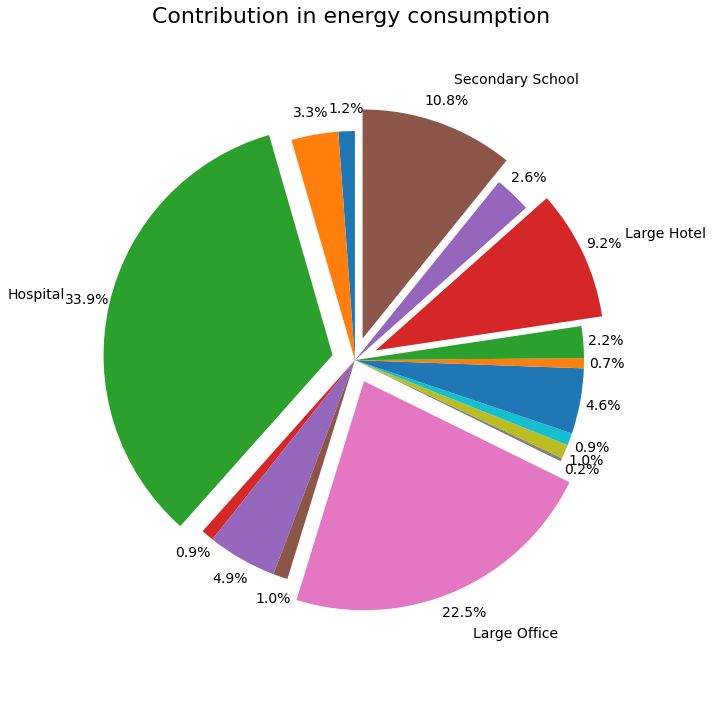

In [88]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = percentdict.values()
labels = '', '', 'Hospital', '','','','Large Office','','','','','','','Large Hotel','','Secondary School'
explode = (0, 0, 0.1, 0, 0, 0, 0.1,0,0,0,0,0,0,0.1,0,0.1)

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(sizes,autopct='%1.1f%%', startangle=90, explode = explode, labels = labels, textprops={'fontsize': 14}, pctdistance=1.1, labeldistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title("Contribution in energy consumption", fontsize = 22)
plt.show()

In [87]:
file_list

['Raw DB/commercial/Energy/RefBldgFullServiceRestaurantNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgPrimarySchoolNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgHospitalNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgWarehouseNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgOutPatientNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgStand-aloneRetailNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgLargeOfficeNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgSmallOfficeNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgStripMallNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgMidriseApartmentNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv',
 'Raw DB/commercial/Energy/RefBldgSuperMarketNew2004_7.1_5.0_3C_USA_CA_SAN_